In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [47]:
data = pd.read_csv(
    "./Stroke_data.csv",
    sep=";",
    decimal=",",
)
print(data.head())

   gender age  hypertension  heart_disease ever_married      work_type  \
0    Male  67             0              1          Yes        Private   
1  Female  61             0              0          Yes  Self-employed   
2    Male  80             0              1          Yes        Private   
3  Female  49             0              0          Yes        Private   
4  Female  79             1              0          Yes  Self-employed   

  Residence_type avg_glucose_level   bmi   smoking_status  stroke  
0          Urban            228.69  36.6  formerly smoked       1  
1          Rural            202.21   NaN     never smoked       1  
2          Rural            105.92  32.5     never smoked       1  
3          Urban            171.23  34.4           smokes       1  
4          Rural            174.12    24     never smoked       1  


In [48]:
categorical_columns = [
    "gender",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
]
data = pd.get_dummies(data, columns=categorical_columns)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
1,61,0,0,202.21,NaN,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80,0,1,105.92,32.5,1,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49,0,0,171.23,34.4,1,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79,1,0,174.12,24,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80,1,0,83.75,NaN,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
5105,81,0,0,125.2,40,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5106,35,0,0,82.99,30.6,0,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5107,51,0,0,166.29,25.6,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False


In [49]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

for column in non_numeric_columns:
    data[column] = data[column].fillna(data[column].mode()[0])
# data['bmi'].value_counts()
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
1,61,0,0,202.21,28.7,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80,0,1,105.92,32.5,1,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49,0,0,171.23,34.4,1,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79,1,0,174.12,24,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80,1,0,83.75,28.7,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
5105,81,0,0,125.2,40,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5106,35,0,0,82.99,30.6,0,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5107,51,0,0,166.29,25.6,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False


## Regresja logistyczna jest modelem statystycznym używanym do przewidywania prawdopodobieństwa wystąpienia zdarzenia binarnego (np. sukces/porażka, tak/nie).

### 1. Załozenia metody sa następujące:
* Brak współliniowości 
* Niezalezność obserwacji 
* Brak wartości odstających
* Kompletność danych jest wymagana 

### 2. Jak metoda ta radzi sobie ze zmiennymi kategorycznymi?
* Nalezy je przekształcić do wartości binarnych **0 1**
* W przypadku zmiennej Kategorycznej przyjmującej n wartości, nalezy stworzyć n-1 kolumn
Przykład: Zmienna "kolor" z wartościami ["czerwony", "zielony", "niebieski"] zostanie przekształcona na dwie kolumny: "kolor_czerwony", "kolor_niebieski".

## Zadanie 1.3

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = data.drop(columns=['stroke'])
y = data['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bez standaryzacji 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_no_scaling = log_reg.predict(X_test)

# Ocena modelu bez standaryzacji
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)

print("Accuracy without scaling:", accuracy_no_scaling)
print("Confusion Matrix without scaling:\n", conf_matrix_no_scaling)

# 3. Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Regresja logistyczna ze standaryzacją
log_reg_scaled = LogisticRegression(max_iter=1000)
log_reg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

# Ocena modelu ze standaryzacją
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

print("Accuracy with scaling:", accuracy_scaled)
print("Confusion Matrix with scaling:\n", conf_matrix_scaled)

# Porównanie wyników
print("Accuracy scaled:", round(accuracy_scaled, 3))
print("Accuracy without scalling:", round(accuracy_no_scaling, 3))
print("Difference in accuracy:", accuracy_scaled - accuracy_no_scaling)

Accuracy without scaling: 0.9393346379647749
Confusion Matrix without scaling:
 [[960   0]
 [ 62   0]]
Accuracy with scaling: 0.9393346379647749
Confusion Matrix with scaling:
 [[960   0]
 [ 62   0]]
Accuracy scaled: 0.939
Accuracy without scalling: 0.939
Difference in accuracy: 0.0


### Standaryzacja nie jest konieczna, wyniki wychodzą w obu przypadkach takie same.

## Zadanie 1.4
### W jaki sposób należy interpretować wyniki (wartości parametrów) uzyskiwane w regresji logistycznej? Przedstawić i zinterpretować wartości parametrów uzyskane podczas budowy modelu regresji logistycznej

In [51]:
data['avg_glucose_level'] = data['avg_glucose_level'].astype('float')
data['bmi'] = data['bmi'].astype('float')

 # type: ignore
data['age'] = data['age'].astype('float')
data['age'] = data['age'].round(0).astype('int')

# def find_outliers(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = column[(column < lower_bound) | (column > upper_bound)]
#     return outliers

# find_outliers(data.avg_glucose_level)


# Regresja logistyczna
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Predykcja na zbiorze uczącym
y_pred = lr_model.predict(X_test) # Predykcja: przypisane klasy
print(y_pred[:10])
y_prob = lr_model.predict_proba(X_test)  # Predykcja: prawdopodobieństwa przynależności do poszczególnych klas
print(y_prob[:10,])
coefficients = lr_model.coef_
intercept = lr_model.intercept_
class_report = classification_report(y_test, y_pred)
print("")
print("Współczynniki:", coefficients)
print("")
print("Wyraz wolny:", intercept)
print("")
print("Raport klasyfikacji:") 
print(class_report)
print("Model ma nierówno pod sufitem (jest niezrównoważony)")

[0 0 0 0 0 0 0 0 0 0]
[[9.93298712e-01 6.70128828e-03]
 [9.92296299e-01 7.70370113e-03]
 [9.70911565e-01 2.90884347e-02]
 [8.62587894e-01 1.37412106e-01]
 [8.94373179e-01 1.05626821e-01]
 [8.55592976e-01 1.44407024e-01]
 [9.29570515e-01 7.04294853e-02]
 [8.88255253e-01 1.11744747e-01]
 [9.98744215e-01 1.25578495e-03]
 [9.99185487e-01 8.14512661e-04]]

Współczynniki: [[ 6.98870596e-02  2.83449113e-01  2.58539841e-01  3.68811334e-03
  -4.80051798e-05 -1.20847162e+00 -1.17851296e+00 -1.02999324e+00
  -1.35699135e+00 -5.27503529e-01 -4.22540203e-02 -3.81614951e-01
  -7.24746806e-01 -7.10865279e-01 -1.21973192e+00 -1.16725267e+00
  -5.68673121e-01 -6.36809248e-01 -7.31616115e-01 -4.49886102e-01]]

Wyraz wolny: [-2.68164248]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

Wyniki zwrócone przez obliczenia wskazują na **precyzję** rzędu 0.94, **czułość** o wartości 1.00 oraz **f1-score** (czyli średnia harmoniczna czułości i precyzji), która wynosi 0.97.

Na tej podstawie mozemy stwierdzić, ze model ma wysokie prawdopodobieństwo zwrócenia prawidłowego wyniku, natomiast w przypadku danych medycznych chcielibyśmy, aby był on jeszcze wyzszy, gdyz chodzi o ludzkie zycie.


# Zadanie 2 - Klasyfikator Naiwny Bayesa 

## 2.1 Czy tę metodę można stosować przy zmiennych kategorycznych i ilościowych?

Tak, klasyfikator Naiwny Bayes może być stosowany zarówno przy zmiennych kategorycznych, jak i ilościowych. Istnieją różne warianty tego klasyfikatora, które są dostosowane do różnych typów danych:

**Gaussian Naive Bayes**: Stosowany do zmiennych ilościowych, zakłada normalny rozkład danych.
**Multinomial Naive Bayes**: Stosowany do zmiennych kategorycznych, szczególnie w przypadku danych tekstowych.
**Bernoulli Naive Bayes**: Stosowany do zmiennych binarnych (0/1).

Wybór odpowiedniego wariantu zależy od charakterystyki danych wejściowych.

## 2.2 Zastosować klasyfikator naiwny Bayesa na odpowiednich danych i ocenić jakość klasyfikacji. Porównać wyniki z tymi uzyskanymi za pomocą regresji logistycznej.

In [52]:
from sklearn.naive_bayes import GaussianNB

data = data.copy()
data['avg_glucose_level'] = data['avg_glucose_level'].astype('float')
data['bmi'] = data['bmi'].astype('float')
data['age'] = data['age'].astype('float')
data['age'] = data['age'].round(0).astype('int')


# Klasyfikator Naiwny Bayesa
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Regresja logistyczna
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ocena jakości klasyfikacji
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Dokładność metody naiwnej Bayes'a:", accuracy_nb)
print("Dokładność metody regresji logistycznej:", accuracy_lr)

print("\nRaport klasyfikacji Naiwny Bayes:\n", classification_report(y_test, y_pred_nb))
print("Raport klasyfikacji Regresja Logistyczna:\n", classification_report(y_test, y_pred_lr))


Dokładność metody naiwnej Bayes'a: 0.5185909980430529
Dokładność metody regresji logistycznej: 0.9393346379647749

Raport klasyfikacji Naiwny Bayes:
               precision    recall  f1-score   support

           0       1.00      0.49      0.66       960
           1       0.11      0.97      0.20        62

    accuracy                           0.52      1022
   macro avg       0.55      0.73      0.43      1022
weighted avg       0.94      0.52      0.63      1022

Raport klasyfikacji Regresja Logistyczna:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Jakość klasyfikacji druzgocąco zła. Metoda naiwna Bayesa zdecydownanie ma gorszą dokładność przewidywań i na tym zestawie danych zupełnie nie nadaje się do uzycia.**

# Zadanie 3 -  Krzywa ROC i wartość AUC

## 3.1 Co to jest próg odcięcia? Zweryfikować jak zmiana progu odcięcia wpływa na uzyskiwane w powyższych metodach wyniki.

Próg odcięcia to wartość, powyżej której model klasyfikuje dane jako pozytywne (np. 1), a poniżej jako negatywne (np. 0). Zmiana progu odcięcia wpływa na czułość (recall) i precyzję (precision) modelu.

In [53]:
# Obliczanie prawdopodobieństw predykcji dla obu modeli
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Analiza wpływu progu odcięcia na wyniki
thresholds = [0.3, 0.5, 0.7]
for thresh in thresholds:
    y_pred_thresh_nb = (y_prob_nb >= thresh).astype(int)
    y_pred_thresh_lr = (y_prob_lr >= thresh).astype(int)
    
    print(f"\nPróg odcięcia: {thresh}")
    print("Naiwny Bayes:")
    print(classification_report(y_test, y_pred_thresh_nb))
    print("Regresja Logistyczna:")
    print(classification_report(y_test, y_pred_thresh_lr))


Próg odcięcia: 0.3
Naiwny Bayes:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       960
           1       0.10      1.00      0.19        62

    accuracy                           0.47      1022
   macro avg       0.55      0.72      0.40      1022
weighted avg       0.95      0.47      0.58      1022

Regresja Logistyczna:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.62      0.08      0.14        62

    accuracy                           0.94      1022
   macro avg       0.78      0.54      0.56      1022
weighted avg       0.92      0.94      0.92      1022


Próg odcięcia: 0.5
Naiwny Bayes:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       960
           1       0.11      0.97      0.20        62

    accuracy                           0.52      1022
   macro avg       0.55      0.73     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

## 3.2 Co to jest krzywa ROC i wartość AUC? W jaki sposób są one tworzone/obliczane?

**Krzywa ROC (Receiver Operating Characteristic)**

Krzywa ROC to wykres, który ilustruje wydajność modelu klasyfikacyjnego na różnych progach odcięcia. Wykres ten przedstawia zależność między:

* True Positive Rate (TPR), czyli czułością (sensitivity) lub recall, a
* False Positive Rate (FPR), czyli 1 - specyficzność (specificity)

**Wartość AUC (Area Under the Curve)**

Wartość AUC to pole pod krzywą ROC. Jest to pojedyncza liczba, która podsumowuje wydajność modelu. Wartość AUC wynosi od 0 do 1, gdzie:

* 0.5 oznacza model losowy,
* 1 oznacza idealny model.

### Jak są tworzone/obliczane?

**1. Obliczanie TPR i FPR:**

* Dla różnych progów odcięcia oblicza się TPR i FPR.
* TPR = TP / (TP + FN)
* FPR = FP / (FP + TN)


**Tworzenie krzywej ROC:**

* Na osi X wykresu umieszcza się FPR, a na osi Y TPR.
* Dla każdego progu odcięcia rysuje się punkt na wykresie.


**Obliczanie wartości AUC:**

* Wartość AUC to pole pod krzywą ROC, które można obliczyć za pomocą metod numerycznych.


## 3.3 Zaprezentować krzywą ROC dla zbudowanych wcześniej modeli. Porównać je ze sobą.


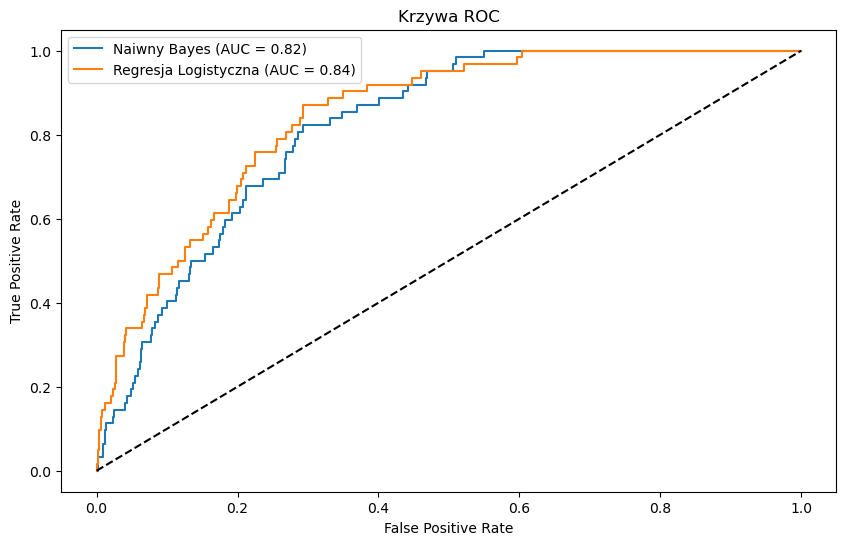

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Generowanie krzywych ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

# Obliczanie wartości AUC
auc_nb = roc_auc_score(y_test, y_prob_nb)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Wykres krzywych ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naiwny Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Regresja Logistyczna (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend()
plt.show()
plt.close()